# Laptop Prices Prediction

### Importing all the required libraries and dataset

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv('laptops.csv',encoding='latin-1')
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
df.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

**Correlation finder!**

In [5]:
df.corr()

,Unnamed: 0,Inches,Price_euros
Unnamed: 0,1.000000,-0.087796,0.067830
Inches,-0.087796,1.000000,0.068197
Price_euros,0.067830,0.068197,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [7]:
data_num = df.select_dtypes(include = ["int64", "float64"])
data_num.columns.tolist()

['Unnamed: 0', 'Inches', 'Price_euros']

***************
## Data Visualization
Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.

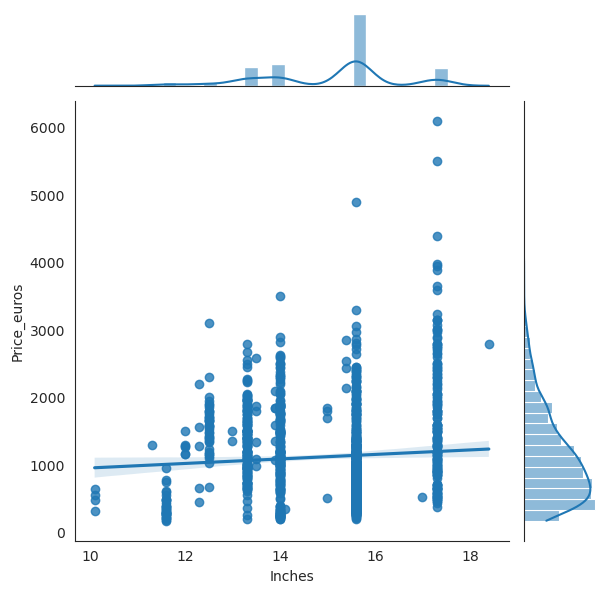

In [8]:
import seaborn as sns
with sns.axes_style("white"):
    sns.jointplot(x='Inches', y='Price_euros', data= data_num, kind = "reg")

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

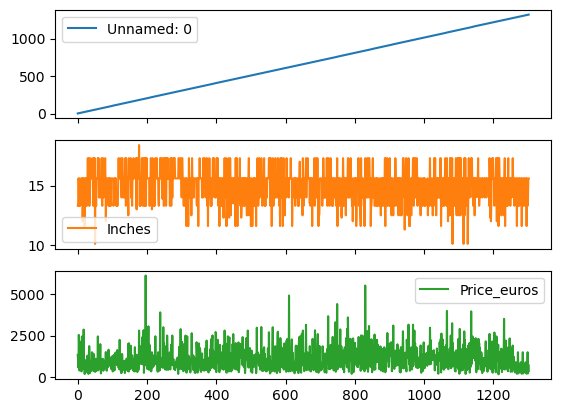

In [9]:
import matplotlib.pyplot as plt
data_num.plot(subplots=True)

<AxesSubplot:xlabel='Inches', ylabel='Probability'>

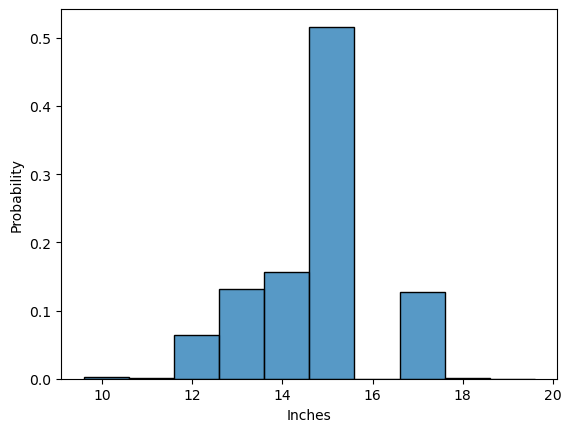

In [10]:
sns.histplot(data=data_num, x="Inches", stat="probability", discrete=True)

<AxesSubplot:xlabel='Price_euros', ylabel='Count'>

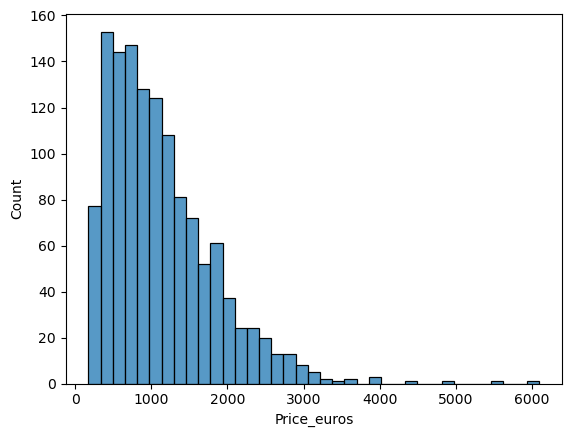

In [11]:
sns.histplot(data = df, x= "Price_euros")

<AxesSubplot:xlabel='Price_euros', ylabel='Count'>

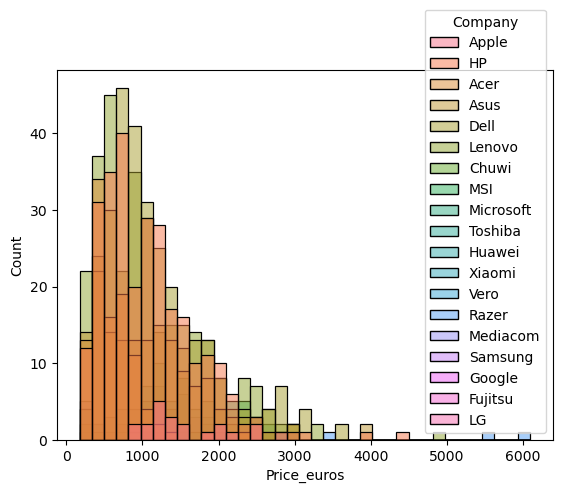

In [12]:
sns.histplot(x = "Price_euros", data = df, hue = "Company")

<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

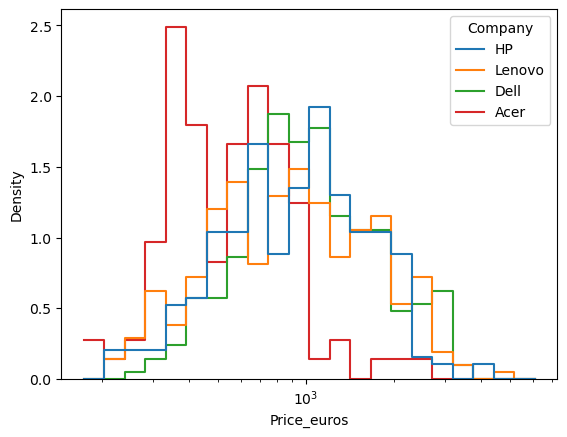

In [13]:
sns.histplot(data = df, x= "Price_euros",hue = "Company", hue_order = [ "HP","Lenovo", 'Dell',"Acer"],
            log_scale = True, element ="step", fill = False, stat = "density", common_norm = False)

In [14]:
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [15]:
df['Inches'].value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
12.0      6
13.5      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: Inches, dtype: int64

In [16]:
df.drop(columns=['Unnamed: 0','Company','Inches','ScreenResolution','TypeName','Weight'],inplace=True)
df.head()

# these feature are unique and does nothing in our predictions, So, we drop it !!

,Product,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,MacBook Pro,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1339.69
1,Macbook Air,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,898.94
2,250 G6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,575.00
3,MacBook Pro,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,2537.45
4,MacBook Pro,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1803.60


In [17]:
df.reset_index(drop=True,inplace=True)

************************************
## Label Encoding
Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      1303 non-null   object 
 1   Cpu          1303 non-null   object 
 2   Ram          1303 non-null   object 
 3   Memory       1303 non-null   object 
 4   Gpu          1303 non-null   object 
 5   OpSys        1303 non-null   object 
 6   Price_euros  1303 non-null   float64
dtypes: float64(1), object(6)
memory usage: 71.4+ KB


In [19]:
col = [feature for feature in df.columns if df[feature].dtype == 'O']

# Using List comprehension for extracting categorical column names 

### Encoding

> Working of below code
* We are going to assign each and every value of a categorical feature to a no.
* This assignment of no.s will be done by how much it worths as target feature
* we are going to group dataset by feature.
* Then, we will take out mean of target feature('Price_euros') of the grouped data.
* Now, Sort the values and get the index.
* Now, make a dictionary, and assign index, to value 0 to n.
* So, Now we can actually get changes to our original dataset

In [20]:
for feature in col:
    labels_ordered= df.groupby([feature])['Price_euros'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    df[feature]=df[feature].map(labels_ordered)

In [21]:
df.head()

,Product,Cpu,Ram,Memory,Gpu,OpSys,Price_euros
0,559,85,3,13,80,8,1339.69
1,333,64,3,14,45,8,898.94
2,107,58,3,20,54,2,575.00
3,559,111,5,30,95,8,2537.45
4,559,99,3,20,84,8,1803.60


In [22]:
y = df['Price_euros']
X = df.drop(columns='Price_euros')

### Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # setting with_mean False, is for a reason !

temp = scaler.fit_transform(X)
X = pd.DataFrame(temp)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle = True)

In [25]:
from sklearn import metrics

#   Prediction Model Creation

### Simple Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
lr.score(X_train,y_train) # train-set score

0.8357155294189313

In [29]:
lr.score(X_test,y_test) # test-set score

0.7847431032252344

In [30]:
y_pred = lr.predict(X_test) # prediction 

In [31]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 195.83342433785157
Residual Sum of Squares(MSE): 114481.2933902416
R2-Score: 0.7847431032252344


### Random Forest Regression 

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=1)

In [33]:
rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [34]:
rfr.score(X_train,y_train) # train-set score 

0.9852196558985368

In [35]:
rfr.score(X_test,y_test) # test-set score

0.9333575624283379

In [36]:
y_pred = rfr.predict(X_test) #prediction

In [37]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 103.11744676234296
Residual Sum of Squares(MSE): 35442.82465367537
R2-Score: 0.9333575624283379


### Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
y_pred = dtr.predict(X_test)

In [40]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 155.1270807770961
Residual Sum of Squares(MSE): 108844.59358920415
R2-Score: 0.7953416776411109


### Lasso Regression

In [41]:
from sklearn import linear_model
lasso = linear_model.Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [42]:
y_pred = lasso.predict(X_test)

In [43]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 195.77804200831898
Residual Sum of Squares(MSE): 114489.55791420737
R2-Score: 0.7847275636053584


### Ridge Regression


In [44]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [45]:
y_pred = ridge.predict(X_test)

In [46]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 195.82514137665922
Residual Sum of Squares(MSE): 114478.95688884088
R2-Score: 0.7847474965023012


### XgBoost Regressor 

In [47]:
from xgboost.sklearn import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [48]:
y_pred = xgb.predict(X_test)

In [49]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 116.45374798359316
Residual Sum of Squares(MSE): 50469.805374465046
R2-Score: 0.9051026297484182


### MLP Regressor 

In [50]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor()
mlp.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [51]:
y_pred = mlp.predict(X_test)

In [52]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 747.3593463231144
Residual Sum of Squares(MSE): 754623.1224782611
R2-Score: -0.4189028335436378


### Gradient Boosting Regressor 

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [54]:
y_pred = gb.predict(X_test)

In [55]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 103.80933995861942
Residual Sum of Squares(MSE): 34943.85078265328
R2-Score: 0.9342957730640421


### Support Vector Machine Regressor 

In [56]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train, y_train)

SVR()

In [57]:
y_pred = svm.predict(X_test)

In [58]:
print(f'Mean Absolute Error(MAE): {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'Residual Sum of Squares(MSE): {metrics.mean_squared_error(y_test, y_pred)}')
print(f'R2-Score: {metrics.r2_score(y_test, y_pred)}')

Mean Absolute Error(MAE): 423.5454581351365
Residual Sum of Squares(MSE): 457446.91016239516
R2-Score: 0.1398716820476137
